## Training the poincare embedding

In [14]:
%load_ext autoreload   
%autoreload 2

import os
import logging
import numpy as np

from gensim.models.poincare import PoincareModel, PoincareKeyedVectors, PoincareRelations

logging.basicConfig(level=logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# poincare_directory = os.path.join(os.getcwd(), 'ML-stuff','poincare-embeddings')
data_directory = os.path.join(os.getcwd(), 'data')
wordnet_mammal_file = os.path.join(data_directory, 'wordnet_mammal_hypernyms.tsv')

The model can be initialized using an iterable of relations, where a relation is simply a pair of nodes

In [5]:
model = PoincareModel(train_data=[('node.1', 'node.2'), ('node.2', 'node.3')])

INFO:gensim.models.poincare:Loading relations from train data..
INFO:gensim.models.poincare:Loaded 2 relations from train data, 3 nodes


The model can also be initialized from a csv-like file containing one relation per line. The module provides a convenience class `PoincareRelations` to do so.

In [6]:
relations = PoincareRelations(file_path=wordnet_mammal_file, delimiter='\t')
model = PoincareModel(train_data=relations)

INFO:gensim.models.poincare:Loading relations from train data..
INFO:gensim.models.poincare:Loaded 7724 relations from train data, 1182 nodes


Note that the above only initializes the model and does not begin training. To train the model: 

In [7]:
model = PoincareModel(train_data=relations, size=2, burn_in=0)
model.train(epochs=1, print_every=500)

INFO:gensim.models.poincare:Loading relations from train data..
INFO:gensim.models.poincare:Loaded 7724 relations from train data, 1182 nodes
INFO:gensim.models.poincare:training model of size 2 with 1 workers on 7724 relations for 1 epochs and 0 burn-in epochs, using lr=0.10000 burn-in lr=0.01000 negative=10
INFO:gensim.models.poincare:Starting training (1 epochs)----------------------------------------
INFO:gensim.models.poincare:Training on epoch 1, examples #4990-#5000, loss: 23.56
INFO:gensim.models.poincare:Time taken for 5000 examples: 0.88 s, 5670.41 examples / s
INFO:gensim.models.poincare:Training finished


The same model can be trained further on more epochs in case the user decides that the model hasn't converged yet.

In [8]:
model.train(epochs=1, print_every=500)

INFO:gensim.models.poincare:training model of size 2 with 1 workers on 7724 relations for 1 epochs and 0 burn-in epochs, using lr=0.10000 burn-in lr=0.01000 negative=10
INFO:gensim.models.poincare:Starting training (1 epochs)----------------------------------------
INFO:gensim.models.poincare:Training on epoch 1, examples #4990-#5000, loss: 22.22
INFO:gensim.models.poincare:Time taken for 5000 examples: 0.87 s, 5752.21 examples / s
INFO:gensim.models.poincare:Training finished


The model can be saved and loaded using two different methods - 

In [10]:
# Saves the entire PoincareModel instance, the loaded model can be trained further
model.save(os.path.join('models','test_model'))
PoincareModel.load(os.path.join('models','test_model'))

INFO:gensim.utils:saving PoincareModel object under models/test_model, separately None
INFO:gensim.utils:saved models/test_model
INFO:gensim.utils:loading PoincareModel object from models/test_model
INFO:gensim.utils:loading kv recursively from models/test_model.kv.* with mmap=None
INFO:gensim.utils:loaded models/test_model


In [11]:
# Saves only the vectors from the PoincareModel instance, in the commonly used word2vec format
model.kv.save_word2vec_format(os.path.join('models','test_vectors'))
PoincareKeyedVectors.load_word2vec_format(os.path.join('models','test_vectors'))

INFO:gensim.models.utils_any2vec:storing 1182x2 projection weights into models/test_vectors
INFO:gensim.models.utils_any2vec:loading projection weights from models/test_vectors
INFO:gensim.models.utils_any2vec:loaded (1182, 2) matrix from models/test_vectors


## Train Poincare Model on WordNet data

**Parameters:**	
**train_data (iterable of (str, str))** – Iterable of relations, e.g. a list of tuples, or a PoincareRelations instance streaming from a file. Note that the relations are treated as ordered pairs, i.e. a relation (a, b) does not imply the opposite relation (b, a). In case the relations are symmetric, the data should contain both relations (a, b) and (b, a).
**size (int, optional)** – Number of dimensions of the trained model.  
**alpha (float, optional)** – Learning rate for training.  
**negative (int, optional)** – Number of negative samples to use.  
**workers (int, optional)** – Number of threads to use for training the model.  
**epsilon (float, optional)** – Constant used for clipping embeddings below a norm of one.  
**regularization_coeff (float, optional)** – Coefficient used for l2-regularization while training (0 effectively disables regularization).  
**burn_in (int, optional)** – Number of epochs to use for burn-in initialization (0 means no burn-in).  
**burn_in_alpha (float, optional)** – Learning rate for burn-in initialization, ignored if burn_in is 0.  
**init_range (2-tuple (float, float)) **– Range within which the vectors are randomly initialized.  
**dtype (numpy.dtype)** – The numpy dtype to use for the vectors in the model (numpy.float64, numpy.float32 etc). Using lower precision floats may be useful in increasing training speed and reducing memory usage.  
**seed (int, optional)** – Seed for random to ensure reproducibility.  
  
gensim.models.poincare.PoincareModel *(train_data, size=50, alpha=0.1, negative=10, workers=1, epsilon=1e-05, regularization_coeff=1.0, burn_in=10, burn_in_alpha=0.01, init_range=(-0.001, 0.001), dtype=<type 'numpy.float64'>, seed=0)*

In [13]:
relations = PoincareRelations(file_path=wordnet_mammal_file, delimiter='\t')
size=50
burn_in=0
workers=1 # multi-threaded version wasn't implemented yet
negative=15
epochs=100
print_every=500
batch_size=10
model = PoincareModel(train_data=relations, size=size, burn_in=burn_in, workers=workers, negative=negative)
model.train(epochs=epochs, print_every=print_every,batch_size=batch_size)

INFO:gensim.models.poincare:Loading relations from train data..
INFO:gensim.models.poincare:Loaded 7724 relations from train data, 1182 nodes
INFO:gensim.models.poincare:training model of size 50 with 1 workers on 7724 relations for 100 epochs and 0 burn-in epochs, using lr=0.10000 burn-in lr=0.01000 negative=15
INFO:gensim.models.poincare:Starting training (100 epochs)----------------------------------------
INFO:gensim.models.poincare:Training on epoch 1, examples #4990-#5000, loss: 27.15
INFO:gensim.models.poincare:Time taken for 5000 examples: 3.15 s, 1588.19 examples / s
INFO:gensim.models.poincare:Training on epoch 2, examples #4990-#5000, loss: 24.87
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.44 s, 2049.95 examples / s
INFO:gensim.models.poincare:Training on epoch 3, examples #4990-#5000, loss: 22.25
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.25 s, 2220.47 examples / s
INFO:gensim.models.poincare:Training on epoch 4, examples #4990-#5000, loss: 

INFO:gensim.models.poincare:Training on epoch 47, examples #4990-#5000, loss: 5.69
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.17 s, 2304.49 examples / s
INFO:gensim.models.poincare:Training on epoch 48, examples #4990-#5000, loss: 5.72
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.19 s, 2284.00 examples / s
INFO:gensim.models.poincare:Training on epoch 49, examples #4990-#5000, loss: 5.67
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.15 s, 2330.22 examples / s
INFO:gensim.models.poincare:Training on epoch 50, examples #4990-#5000, loss: 5.74
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.22 s, 2248.01 examples / s
INFO:gensim.models.poincare:Training on epoch 51, examples #4990-#5000, loss: 5.65
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.17 s, 2308.81 examples / s
INFO:gensim.models.poincare:Training on epoch 52, examples #4990-#5000, loss: 5.67
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.10 s, 2

INFO:gensim.models.poincare:Time taken for 5000 examples: 2.09 s, 2396.98 examples / s
INFO:gensim.models.poincare:Training on epoch 96, examples #4990-#5000, loss: 4.90
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.23 s, 2239.80 examples / s
INFO:gensim.models.poincare:Training on epoch 97, examples #4990-#5000, loss: 4.90
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.08 s, 2405.85 examples / s
INFO:gensim.models.poincare:Training on epoch 98, examples #4990-#5000, loss: 4.87
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.21 s, 2259.91 examples / s
INFO:gensim.models.poincare:Training on epoch 99, examples #4990-#5000, loss: 4.83
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.20 s, 2271.56 examples / s
INFO:gensim.models.poincare:Training on epoch 100, examples #4990-#5000, loss: 4.81
INFO:gensim.models.poincare:Time taken for 5000 examples: 2.20 s, 2273.02 examples / s
INFO:gensim.models.poincare:Training finished


## Save Poincare model

In [16]:
# Saves the entire PoincareModel instance, the loaded model can be trained further
model.save(os.path.join("models",'gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50'))

# Saves only the vectors from the PoincareModel instance, in the commonly used word2vec format
model.kv.save_word2vec_format(os.path.join("models",'gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50_vectors'))
PoincareKeyedVectors.load_word2vec_format(os.path.join("models",'gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50_vectors'))

INFO:gensim.utils:saving PoincareModel object under models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50, separately None
INFO:gensim.utils:saved models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50
INFO:gensim.models.utils_any2vec:storing 1182x50 projection weights into models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50_vectors
INFO:gensim.models.utils_any2vec:loading projection weights from models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50_vectors
INFO:gensim.models.utils_any2vec:loaded (1182, 50) matrix from models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50_vectors


## What the embedding can be used for

In [17]:
# Load an example model
test_model_path = os.path.join("models", 'gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50')
model = PoincareModel.load(test_model_path)

INFO:gensim.utils:loading PoincareModel object from models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50
INFO:gensim.utils:loading kv recursively from models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50.kv.* with mmap=None
INFO:gensim.utils:loaded models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50


The learnt representations can be used to perform various kinds of useful operations. This section is split into two - some simple operations that are directly mentioned in the paper, as well as some experimental operations that are hinted at, and might require more work to refine.

The models that are used in this section have been trained on the transitive closure of the WordNet hypernym graph. The transitive closure is the list of all the direct and indirect hypernyms in the WordNet graph. An example of a direct hypernym is `(seat.n.03, furniture.n.01)` while an example of an indirect hypernym is `(seat.n.03, physical_entity.n.01)`.



### Simple operations

All the following operations are based simply on the notion of distance between two nodes in hyperbolic space.

In [18]:
# Distance between any two nodes
model.kv.distance('leopard.n.02', 'mammal.n.01')

4.515998999588967

In [19]:
model.kv.distance('big_cat.n.01', 'carnivore.n.01')

3.715503456706437

In [20]:
model.kv.distance('leopard.n.02', 'carnivore.n.01')

5.039552502547949

In [21]:
# Nodes most similar to a given input node - distance
model.kv.most_similar('carnivore.n.01')

[('placental.n.01', 1.7432715310007518),
 ('dog.n.01', 1.755854663237493),
 ('mammal.n.01', 1.802959631901569),
 ('canine.n.02', 1.826551037487854),
 ('hunting_dog.n.01', 2.39375637475168),
 ('sporting_dog.n.01', 2.940845519706195),
 ('working_dog.n.01', 2.9437786502995587),
 ('hound.n.01', 3.018034574856502),
 ('terrier.n.01', 3.021141213879427),
 ('musteline_mammal.n.01', 3.203195366421586)]

In [22]:
model.kv.most_similar('placental.n.01')

[('mammal.n.01', 0.12277073201589005),
 ('carnivore.n.01', 1.743271531000752),
 ('ungulate.n.01', 2.1898838072227416),
 ('even-toed_ungulate.n.01', 2.4824257575381115),
 ('rodent.n.01', 2.484662273929472),
 ('dog.n.01', 2.5099735231840024),
 ('primate.n.02', 2.5142082400097268),
 ('ruminant.n.01', 2.5476210181218364),
 ('musteline_mammal.n.01', 2.6224420164509685),
 ('canine.n.02', 2.6429170791206125)]

In [23]:
model.kv.most_similar('water_buffalo.n.01')

[('even-toed_ungulate.n.01', 4.689904617029331),
 ('mammal.n.01', 4.693427949561533),
 ('placental.n.01', 4.712578153835068),
 ('ruminant.n.01', 4.7954664258462065),
 ('ungulate.n.01', 4.997039530781316),
 ('bovid.n.01', 5.309074501436365),
 ('old_world_buffalo.n.01', 5.623956644544567),
 ('antelope.n.01', 6.122683937979408),
 ('bovine.n.01', 6.145427263054722),
 ('deer.n.01', 6.240693943260611)]

In [25]:
# Rank of distance of node 2 from node 1 in relation to distances of all nodes from node 1
model.kv.rank('dog.n.01', 'carnivore.n.01')

2

In [26]:
# Rank of distance of node 2 from node 1 in relation to distances of all nodes from node 1
model.kv.rank('big_cat.n.01', 'carnivore.n.01')

3

In [27]:
# Finding Poincare distance between input vectors
vector_1 = np.random.uniform(size=(100,)) # vector with 100 dim
vector_2 = np.random.uniform(size=(100,))
vectors_multiple = np.random.uniform(size=(5, 100)) # 5 vectors of 100 dim each

# Distance between vector_1 and vector_2
print(PoincareKeyedVectors.vector_distance(vector_1, vector_2))
# Distance between vector_1 and each vector in vectors_multiple
print(PoincareKeyedVectors.vector_distance_batch(vector_1, vectors_multiple))

0.25865218998799167
[0.26385153 0.249844   0.23673207 0.24484933 0.285299  ]


### Experimental operations

These operations are based on the notion that the norm of a vector represents its hierarchical position. Leaf nodes typically tend to have the highest norms, and as we move up the hierarchy, the norm decreases, with the root node being close to the center (or origin).

In [28]:
# Closest child node
model.kv.closest_child('virginia_deer.n.01')

'musk_ox.n.01'

In [48]:
# Closest child node
model.kv.closest_child('mammal.n.01')

'carnivore.n.01'

In [49]:
# Closest child node
model.kv.closest_child('carnivore.n.01')

'dog.n.01'

In [52]:
# Closest child node
model.kv.closest_child('dog.n.01')

'canine.n.02'

In [55]:
# Closest child node
model.kv.closest_parent('canine.n.02')

'dog.n.01'

In [29]:
# Closest parent node
model.kv.closest_parent('virginia_deer.n.01')

'mammal.n.01'

In [30]:
# Position in hierarchy - lower values represent that the node is higher in the hierarchy
print(model.kv.norm('virginia_deer.n.01'))
print(model.kv.norm('sheep.n.01'))
print(model.kv.norm('dog.n.01'))
print(model.kv.norm('placental.n.01'))
print(model.kv.norm('mammal.n.01'))

0.9976372943915272
0.9561101492027996
0.8550665675983781
0.04170267999374588
0.048271998440244025


In [31]:
# Difference in hierarchy between the first node and the second node
# Positive values indicate the first node is higher in the hierarchy
print(model.kv.difference_in_hierarchy('dog.n.01', 'sheep.n.01'))

0.1010435816044215


In [32]:
# One possible descendant chain
model.kv.descendants('mammal.n.01')

['carnivore.n.01',
 'dog.n.01',
 'canine.n.02',
 'hunting_dog.n.01',
 'sporting_dog.n.01']

In [33]:
# One possible ancestor chain
model.kv.ancestors('dog.n.01')

['carnivore.n.01', 'placental.n.01']

In [34]:
model.kv.ancestors('sheep.n.01')

['ruminant.n.01',
 'even-toed_ungulate.n.01',
 'ungulate.n.01',
 'mammal.n.01',
 'placental.n.01']

# Visualization

In [37]:
from gensim.viz.poincare import poincare_2d_visualization, poincare_distance_heatmap
import plotly.plotly as py
py.sign_in('Harman','<PLOTLY KEY>')

In [38]:
all_relations = list(set(relations))

In [39]:
# show_node_labels = ['mammal.n.01', 'placental.n.01', 'tiger.n.02', 'homo_sapiens.n.01']
show_node_labels = ['mammal.n.01', 'placental.n.01', 'ungulate.n.01', 'carnivore.n.01', 'rodent.n.01',
'canine.n.02', 'even-toed_ungulate.n.01', 'odd-toed_ungulate.n.01', 'elephant.n.01',
'rhinoceros.n.01', 'german_shepherd.n.01', 'feline.n.01', 'tiger.n.02', 'homo_sapiens.n.01']
filtered_set = set()
for relation in all_relations:
    if relation[0] in show_node_labels and relation[1] in show_node_labels:
        filtered_set.add(relation)

In [40]:
filtered_set

{('canine.n.02', 'canine.n.02'),
 ('canine.n.02', 'carnivore.n.01'),
 ('canine.n.02', 'mammal.n.01'),
 ('canine.n.02', 'placental.n.01'),
 ('carnivore.n.01', 'carnivore.n.01'),
 ('carnivore.n.01', 'mammal.n.01'),
 ('carnivore.n.01', 'placental.n.01'),
 ('elephant.n.01', 'elephant.n.01'),
 ('elephant.n.01', 'mammal.n.01'),
 ('elephant.n.01', 'placental.n.01'),
 ('even-toed_ungulate.n.01', 'even-toed_ungulate.n.01'),
 ('even-toed_ungulate.n.01', 'mammal.n.01'),
 ('even-toed_ungulate.n.01', 'placental.n.01'),
 ('even-toed_ungulate.n.01', 'ungulate.n.01'),
 ('feline.n.01', 'carnivore.n.01'),
 ('feline.n.01', 'feline.n.01'),
 ('feline.n.01', 'mammal.n.01'),
 ('feline.n.01', 'placental.n.01'),
 ('german_shepherd.n.01', 'canine.n.02'),
 ('german_shepherd.n.01', 'carnivore.n.01'),
 ('german_shepherd.n.01', 'german_shepherd.n.01'),
 ('german_shepherd.n.01', 'mammal.n.01'),
 ('german_shepherd.n.01', 'placental.n.01'),
 ('homo_sapiens.n.01', 'homo_sapiens.n.01'),
 ('homo_sapiens.n.01', 'mammal.n.

### Since plotly viz just work on 2D vectors, we'll demonstrate viz on model with dimension=2

In [43]:
size=2
burn_in=0
workers=1
negative=10
model_with_dim_2 = PoincareModel(train_data=relations,size=size, burn_in=burn_in,workers=workers,negative=negative)
model_with_dim_2.train(epochs=100, print_every=400,batch_size=10)

INFO:gensim.models.poincare:Loading relations from train data..
INFO:gensim.models.poincare:Loaded 7724 relations from train data, 1182 nodes
INFO:gensim.models.poincare:training model of size 2 with 1 workers on 7724 relations for 100 epochs and 0 burn-in epochs, using lr=0.10000 burn-in lr=0.01000 negative=10
INFO:gensim.models.poincare:Starting training (100 epochs)----------------------------------------
INFO:gensim.models.poincare:Training on epoch 1, examples #3990-#4000, loss: 23.65
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.74 s, 5372.61 examples / s
INFO:gensim.models.poincare:Training on epoch 2, examples #3990-#4000, loss: 22.30
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.70 s, 5726.28 examples / s
INFO:gensim.models.poincare:Training on epoch 3, examples #3990-#4000, loss: 20.87
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.71 s, 5647.47 examples / s
INFO:gensim.models.poincare:Training on epoch 4, examples #3990-#4000, loss: 1

INFO:gensim.models.poincare:Training on epoch 47, examples #3990-#4000, loss: 9.54
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.69 s, 5780.41 examples / s
INFO:gensim.models.poincare:Training on epoch 48, examples #3990-#4000, loss: 9.45
INFO:gensim.models.poincare:Time taken for 4000 examples: 1.08 s, 3715.93 examples / s
INFO:gensim.models.poincare:Training on epoch 49, examples #3990-#4000, loss: 9.28
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.74 s, 5395.13 examples / s
INFO:gensim.models.poincare:Training on epoch 50, examples #3990-#4000, loss: 9.06
INFO:gensim.models.poincare:Time taken for 4000 examples: 1.01 s, 3960.33 examples / s
INFO:gensim.models.poincare:Training on epoch 51, examples #3990-#4000, loss: 9.21
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.69 s, 5762.47 examples / s
INFO:gensim.models.poincare:Training on epoch 52, examples #3990-#4000, loss: 8.91
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.70 s, 5

INFO:gensim.models.poincare:Time taken for 4000 examples: 0.70 s, 5682.91 examples / s
INFO:gensim.models.poincare:Training on epoch 96, examples #3990-#4000, loss: 6.97
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.82 s, 4851.71 examples / s
INFO:gensim.models.poincare:Training on epoch 97, examples #3990-#4000, loss: 6.81
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.93 s, 4316.50 examples / s
INFO:gensim.models.poincare:Training on epoch 98, examples #3990-#4000, loss: 6.95
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.78 s, 5132.96 examples / s
INFO:gensim.models.poincare:Training on epoch 99, examples #3990-#4000, loss: 6.98
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.96 s, 4177.59 examples / s
INFO:gensim.models.poincare:Training on epoch 100, examples #3990-#4000, loss: 6.77
INFO:gensim.models.poincare:Time taken for 4000 examples: 0.80 s, 4991.91 examples / s
INFO:gensim.models.poincare:Training finished


In [44]:
fig = poincare_2d_visualization(model_with_dim_2, filtered_set, "Poincare Hierarchy", show_node_labels=show_node_labels,)

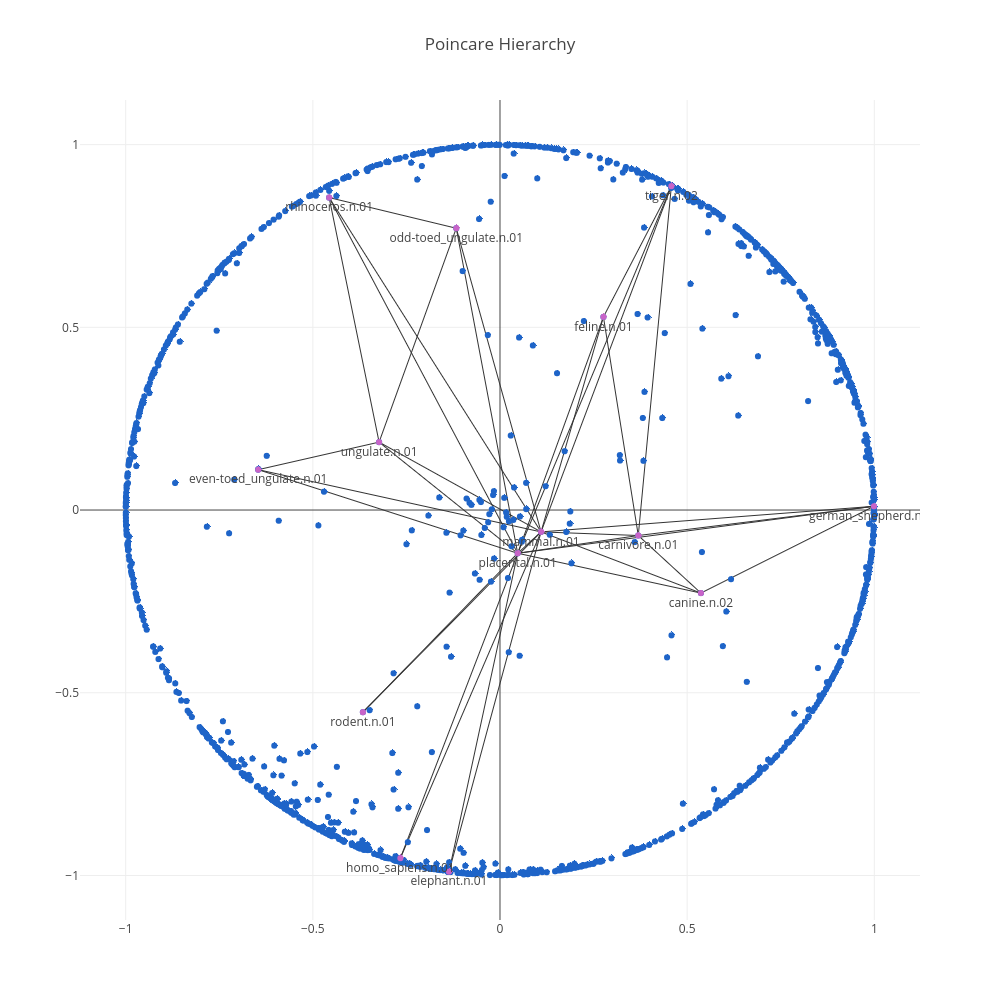

In [45]:
py.image.ishow(fig,width=1000,height=1000)

In [46]:
py.image.save_as(fig, filename='poincare_viz.png')

Note that the chains are not symmetric - while descending to the closest child recursively.

This is despite the fact that Poincaré distance is symmetric (like any distance in a metric space). The asymmetry stems from the fact that even if node `Y` is the closest node to node `X` amongst all nodes with a higher norm (lower in the hierarchy) than `X`, node `X` may not be the closest node to node `Y` amongst all the nodes with a lower norm (higher in the hierarchy) than `Y`.